# BÀI 3: PHÂN LOẠI MỨC ĐỘ THẢM HỌA (CLASSIFICATION)

## Mục tiêu
Xây dựng mô hình phân loại để dự đoán mức độ thảm họa: **Nhỏ - Lớn - Siêu Thảm Họa**

## Mô tả bài toán
Bài toán phân loại (Classification) dự đoán nhãn/lớp của một mẫu dữ liệu dựa trên các đặc trưng đầu vào.

**Nội dung thực hiện:**
- Xây dựng mô hình phân loại mức độ thảm họa
- So sánh hiệu suất của nhiều thuật toán
- Đánh giá bằng các chỉ số: Accuracy, Precision, Recall, F1-Score

## Đặc tả Input/Output

| Input | Mô tả |
|-------|-------|
| country | Tên quốc gia |
| disaster_type | Loại thảm họa |
| severity_index | Chỉ số nghiêm trọng (0-10) |
| response_time_hours | Thời gian phản ứng (giờ) |
| response_efficiency_score | Điểm hiệu quả phản ứng (0-100) |
| latitude, longitude | Tọa độ địa lý |
| casualties | Số người thương vong |
| economic_loss_usd | Thiệt hại kinh tế (USD) |
| aid_amount_usd | Viện trợ quốc tế (USD) |
| recovery_days | Số ngày hồi phục |

| Output | Mô tả |
|--------|-------|
| disaster_level | 0: Nhỏ, 1: Lớn, 2: Siêu Thảm Họa |

## Thuật toán sử dụng
1. Random Forest Classifier
2. Logistic Regression
3. Support Vector Machine (SVM)
4. K-Nearest Neighbors (KNN)
5. Decision Tree
6. Gradient Boosting

## IMPORT THƯ VIỆN VÀ LOAD DỮ LIỆU

### Import các thư viện cần thiết

In [3]:
# Import thư viện
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, roc_curve, auc, roc_auc_score
)

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12
pd.set_option('display.max_columns', None)

print("Import thu vien thanh cong!")

Import thu vien thanh cong!


### Đọc dữ liệu từ file CSV

In [4]:
# Doc du lieu
file_path = 'global_disaster_response_2018_2024.csv'
df = pd.read_csv(file_path)

print("THONG TIN TONG QUAN")
print(f"So luong ban ghi: {df.shape[0]:,}")
print(f"So luong dac trung: {df.shape[1]}")
print(f"\nDanh sach cot: {list(df.columns)}")
print("\n5 dong dau tien:")
df.head()

THONG TIN TONG QUAN
So luong ban ghi: 50,000
So luong dac trung: 12

Danh sach cot: ['date', 'country', 'disaster_type', 'severity_index', 'casualties', 'economic_loss_usd', 'response_time_hours', 'aid_amount_usd', 'response_efficiency_score', 'recovery_days', 'latitude', 'longitude']

5 dong dau tien:


,date,country,disaster_type,severity_index,casualties,economic_loss_usd,response_time_hours,aid_amount_usd,response_efficiency_score,recovery_days,latitude,longitude
0,31/1/2021,Brazil,Earthquake,5.99,111,7934365.71,15.62,271603.79,83.21,67,-30.613,-122.557
1,23/12/2018,Brazil,Extreme Heat,6.53,100,8307648.99,5.03,265873.81,96.18,55,10.859,-159.194
2,10/8/2020,India,Hurricane,1.55,22,765136.99,32.54,49356.49,60.40,22,0.643,-160.978
3,15/9/2022,Indonesia,Extreme Heat,4.55,94,1308251.31,7.83,237512.88,86.41,47,-33.547,30.350
4,28/9/2022,United States,Wildfire,3.80,64,2655864.36,21.90,188910.69,72.81,42,-19.170,-117.137


## KHÁM PHÁ VÀ TIỀN XỬ LÝ DỮ LIỆU

### Kiểm tra thông tin dữ liệu

In [5]:
# Kiem tra kieu du lieu
print("KIEU DU LIEU CUA TUNG COT:")
print(df.dtypes)

# Kiem tra gia tri thieu
print("\nKIEM TRA GIA TRI THIEU:")
missing = df.isnull().sum()
missing_percent = (missing / len(df) * 100).round(2)
missing_df = pd.DataFrame({'So luong thieu': missing, 'Ty le (%)': missing_percent})
print(missing_df)

# Thong ke mo ta
print("\nTHONG KE MO TA:")
df.describe()

KIEU DU LIEU CUA TUNG COT:
date                          object
country                       object
disaster_type                 object
severity_index               float64
casualties                     int64
economic_loss_usd            float64
response_time_hours          float64
aid_amount_usd               float64
response_efficiency_score    float64
recovery_days                  int64
latitude                     float64
longitude                    float64
dtype: object

KIEM TRA GIA TRI THIEU:
                           So luong thieu  Ty le (%)
date                                    0        0.0
country                                 0        0.0
disaster_type                           0        0.0
severity_index                          0        0.0
casualties                              0        0.0
economic_loss_usd                       0        0.0
response_time_hours                     0        0.0
aid_amount_usd                          0        0.0
response_effi

,severity_index,casualties,economic_loss_usd,response_time_hours,aid_amount_usd,response_efficiency_score,recovery_days,latitude,longitude
count,50000.000000,50000.000000,5.000000e+04,50000.000000,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.015769,100.591140,5.068593e+06,12.183027,2.500003e+05,87.574025,49.682560,0.231205,0.089889
std,1.942843,65.052064,3.268541e+06,9.259081,1.432275e+05,10.188961,20.098944,34.759662,98.380208
min,1.000000,0.000000,5.273900e+02,1.000000,1.660000e+01,29.750000,2.000000,-59.994000,-169.998000
25%,3.660000,51.000000,2.585513e+06,6.270000,1.429663e+05,83.060000,36.000000,-29.848250,-85.551750
50%,4.990000,91.000000,4.548351e+06,10.510000,2.305365e+05,89.180000,49.000000,0.267500,0.390500
75%,6.340000,138.000000,6.950615e+06,15.450000,3.352259e+05,94.700000,63.000000,30.488250,85.665000
max,10.000000,524.000000,2.445624e+07,63.100000,1.126465e+06,100.000000,112.000000,59.997000,169.999000


### Tạo biến mục tiêu - Mức độ thảm họa

Phân loại dựa trên tổng hợp: severity_index, casualties, economic_loss_usd
- **Mức 0 (Nhỏ)**: Điểm tổng hợp thấp
- **Mức 1 (Lớn)**: Điểm tổng hợp trung bình  
- **Mức 2 (Siêu Thảm Họa)**: Điểm tổng hợp cao

In [13]:
def classify_disaster_level(row):
    """Phan loai muc do tham hoa"""
    severity = row['severity_index']
    casualties = row['casualties']
    economic_loss = row['economic_loss_usd']
    
    score = 0
    
    # Danh gia theo severity_index
    if severity >= 7:
        score += 3
    elif severity >= 3.5:
        score += 2
    else:
        score += 1
    
    # Danh gia theo casualties
    if casualties >= 150:
        score += 3
    elif casualties >= 50:
        score += 2
    else:
        score += 1
    
    # Danh gia theo economic_loss
    if economic_loss >= 6000000:
        score += 3
    elif economic_loss >= 2000000:
        score += 2
    else:
        score += 1
    
    # Phan loai cuoi cung
    if score >= 7:
        return 2  # Sieu tham hoa
    elif score >= 5:
        return 1  # Tham hoa lon
    else:
        return 0  # Tham hoa nho

# Ap dung phan loai
df['disaster_level'] = df.apply(classify_disaster_level, axis=1)

disaster_labels = {0: 'Nho', 1: 'Lon', 2: 'Sieu Tham Hoa'}
df['disaster_level_name'] = df['disaster_level'].map(disaster_labels)

# Thong ke phan bo
print("PHAN BO MUC DO THAM HOA:")
level_counts = df['disaster_level_name'].value_counts()
for level, count in level_counts.items():
    percentage = count / len(df) * 100
    print(f"  {level}: {count:,} ({percentage:.2f}%)")

PHAN BO MUC DO THAM HOA:
  Lon: 21,931 (43.86%)
  Sieu Tham Hoa: 19,696 (39.39%)
  Nho: 8,373 (16.75%)


### Trực quan hóa phân bố mức độ thảm họa

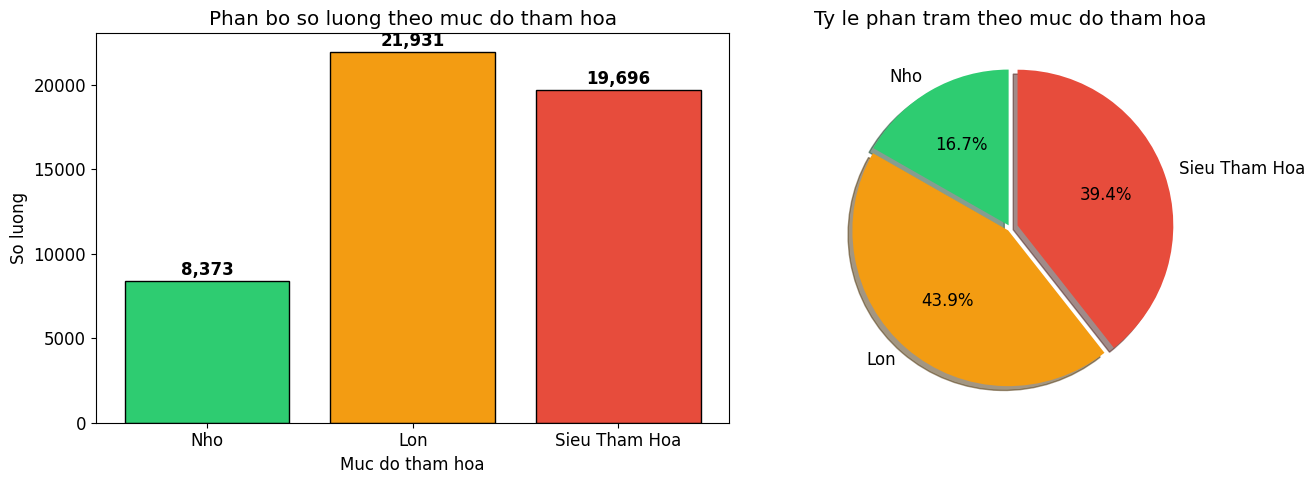

In [14]:
import os
os.makedirs('figures', exist_ok=True)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
colors = ['#2ecc71', '#f39c12', '#e74c3c']

# Bieu do cot
level_order = ['Nho', 'Lon', 'Sieu Tham Hoa']
level_counts_sorted = df['disaster_level_name'].value_counts().reindex(level_order)

bars = axes[0].bar(level_counts_sorted.index, level_counts_sorted.values, color=colors, edgecolor='black')
axes[0].set_xlabel('Muc do tham hoa')
axes[0].set_ylabel('So luong')
axes[0].set_title('Phan bo so luong theo muc do tham hoa')

for bar, count in zip(bars, level_counts_sorted.values):
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 100, 
                 f'{count:,}', ha='center', va='bottom', fontweight='bold')

# Bieu do tron
axes[1].pie(level_counts_sorted.values, labels=level_counts_sorted.index, colors=colors,
            autopct='%1.1f%%', startangle=90, explode=(0.02, 0.02, 0.05), shadow=True)
axes[1].set_title('Ty le phan tram theo muc do tham hoa')

plt.tight_layout()
plt.savefig('figures/phan_bo_muc_do_tham_hoa.png', dpi=150, bbox_inches='tight')
plt.show()

### Mã hóa biến phân loại (Label Encoding)

In [15]:
# Tao ban sao de xu ly
df_processed = df.copy()

# Khoi tao Label Encoders
le_country = LabelEncoder()
le_disaster = LabelEncoder()

# Ma hoa bien 'country' va 'disaster_type'
df_processed['country_encoded'] = le_country.fit_transform(df_processed['country'])
df_processed['disaster_type_encoded'] = le_disaster.fit_transform(df_processed['disaster_type'])

print("MA HOA BIEN PHAN LOAI:")
print(f"\nSo quoc gia: {len(le_country.classes_)}")
print(f"So loai tham hoa: {len(le_disaster.classes_)}")

print("\nCac loai tham hoa:")
disaster_mapping = dict(zip(le_disaster.classes_, le_disaster.transform(le_disaster.classes_)))
for disaster, code in disaster_mapping.items():
    print(f"  {disaster}: {code}")

MA HOA BIEN PHAN LOAI:

So quoc gia: 20
So loai tham hoa: 10

Cac loai tham hoa:
  Drought: 0
  Earthquake: 1
  Extreme Heat: 2
  Flood: 3
  Hurricane: 4
  Landslide: 5
  Storm Surge: 6
  Tornado: 7
  Volcanic Eruption: 8
  Wildfire: 9


### Chuẩn bị Features (X) và Target (y)

In [16]:
# Danh sach dac trung
feature_columns = [
    'country_encoded', 'disaster_type_encoded', 'severity_index',
    'response_time_hours', 'response_efficiency_score',
    'latitude', 'longitude', 'casualties',
    'economic_loss_usd', 'aid_amount_usd', 'recovery_days'
]

X = df_processed[feature_columns]
y = df_processed['disaster_level']

print("THONG TIN DAC TRUNG VA NHAN:")
print(f"Kich thuoc X: {X.shape}")
print(f"Kich thuoc y: {y.shape}")

print("\nPhan bo nhan:")
for level in sorted(y.unique()):
    count = (y == level).sum()
    print(f"  Muc {level} ({disaster_labels[level]}): {count:,} ({count/len(y)*100:.2f}%)")

THONG TIN DAC TRUNG VA NHAN:
Kich thuoc X: (50000, 11)
Kich thuoc y: (50000,)

Phan bo nhan:
  Muc 0 (Nho): 8,373 (16.75%)
  Muc 1 (Lon): 21,931 (43.86%)
  Muc 2 (Sieu Tham Hoa): 19,696 (39.39%)


### Chuẩn hóa dữ liệu (StandardScaler)

Công thức: $z = \frac{x - \mu}{\sigma}$

In [17]:
# Chuan hoa du lieu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns=feature_columns)

print("THONG KE SAU KHI CHUAN HOA:")
print(X_scaled_df.describe().round(2))

THONG KE SAU KHI CHUAN HOA:
       country_encoded  disaster_type_encoded  severity_index  \
count         50000.00               50000.00        50000.00   
mean              0.00                   0.00            0.00   
std               1.00                   1.00            1.00   
min              -1.64                  -1.57           -2.07   
25%              -0.94                  -0.87           -0.70   
50%              -0.08                  -0.17           -0.01   
75%               0.79                   0.87            0.68   
max               1.65                   1.57            2.57   

       response_time_hours  response_efficiency_score  latitude  longitude  \
count             50000.00                   50000.00  50000.00   50000.00   
mean                 -0.00                      -0.00     -0.00       0.00   
std                   1.00                       1.00      1.00       1.00   
min                  -1.21                      -5.68     -1.73      -1.73

### Chia tập dữ liệu Train/Test (80/20)

In [18]:
# Chia du lieu 80-20
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("KET QUA CHIA DU LIEU:")
print(f"Tap train: {len(X_train):,} mau ({len(X_train)/len(y)*100:.0f}%)")
print(f"Tap test: {len(X_test):,} mau ({len(X_test)/len(y)*100:.0f}%)")

KET QUA CHIA DU LIEU:
Tap train: 40,000 mau (80%)
Tap test: 10,000 mau (20%)


## XÂY DỰNG VÀ HUẤN LUYỆN MÔ HÌNH

### Khởi tạo các mô hình phân loại

In [20]:
# Khoi tao cac mo hinh
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=15, random_state=42, n_jobs=-1),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'SVM': SVC(kernel='rbf', C=1.0, probability=True, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5, weights='distance', n_jobs=-1),
    'Decision Tree': DecisionTreeClassifier(max_depth=15, min_samples_split=10, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
}

print(f"Da khoi tao {len(models)} mo hinh phan loai")

Da khoi tao 6 mo hinh phan loai


### Huấn luyện và đánh giá các mô hình

In [21]:
import time

results = {}

print("HUAN LUYEN CAC MO HINH")
print("=" * 60)

for name, model in models.items():
    print(f"\nDang huan luyen: {name}")
    
    start_time = time.time()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    training_time = time.time() - start_time
    
    # Tinh cac chi so
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    results[name] = {
        'model': model, 'y_pred': y_pred,
        'accuracy': accuracy, 'precision': precision,
        'recall': recall, 'f1_score': f1, 'training_time': training_time
    }
    
    print(f"  Accuracy: {accuracy*100:.2f}%, F1-Score: {f1*100:.2f}%, Time: {training_time:.2f}s")

print("\n" + "=" * 60)
print("HOAN THANH HUAN LUYEN!")

HUAN LUYEN CAC MO HINH

Dang huan luyen: Random Forest
  Accuracy: 99.95%, F1-Score: 99.95%, Time: 1.50s

Dang huan luyen: Logistic Regression
  Accuracy: 87.50%, F1-Score: 87.50%, Time: 0.22s

Dang huan luyen: SVM
  Accuracy: 89.12%, F1-Score: 89.12%, Time: 96.76s

Dang huan luyen: KNN
  Accuracy: 87.03%, F1-Score: 87.05%, Time: 1.17s

Dang huan luyen: Decision Tree
  Accuracy: 99.97%, F1-Score: 99.97%, Time: 0.15s

Dang huan luyen: Gradient Boosting
  Accuracy: 99.96%, F1-Score: 99.96%, Time: 43.28s

HOAN THANH HUAN LUYEN!


## SO SÁNH VÀ ĐÁNH GIÁ MÔ HÌNH

### Bảng so sánh tổng hợp

In [22]:
# Tao bang so sanh
comparison_data = []
for name, result in results.items():
    comparison_data.append({
        'Mo hinh': name,
        'Accuracy (%)': round(result['accuracy'] * 100, 2),
        'Precision (%)': round(result['precision'] * 100, 2),
        'Recall (%)': round(result['recall'] * 100, 2),
        'F1-Score (%)': round(result['f1_score'] * 100, 2),
        'Thoi gian (s)': round(result['training_time'], 2)
    })

comparison_df = pd.DataFrame(comparison_data)
comparison_df = comparison_df.sort_values('F1-Score (%)', ascending=False)

print("BANG SO SANH HIEU SUAT CAC MO HINH")
print("=" * 80)
print(comparison_df.to_string(index=False))

best_model_name = comparison_df.iloc[0]['Mo hinh']
best_f1 = comparison_df.iloc[0]['F1-Score (%)']
print(f"\nMO HINH TOT NHAT: {best_model_name} (F1-Score: {best_f1}%)")

BANG SO SANH HIEU SUAT CAC MO HINH
            Mo hinh  Accuracy (%)  Precision (%)  Recall (%)  F1-Score (%)  Thoi gian (s)
      Decision Tree         99.97          99.97       99.97         99.97           0.15
  Gradient Boosting         99.96          99.96       99.96         99.96          43.28
      Random Forest         99.95          99.95       99.95         99.95           1.50
                SVM         89.12          89.13       89.12         89.12          96.76
Logistic Regression         87.50          87.52       87.50         87.50           0.22
                KNN         87.03          87.16       87.03         87.05           1.17

MO HINH TOT NHAT: Decision Tree (F1-Score: 99.97%)


### Trực quan hóa so sánh hiệu suất

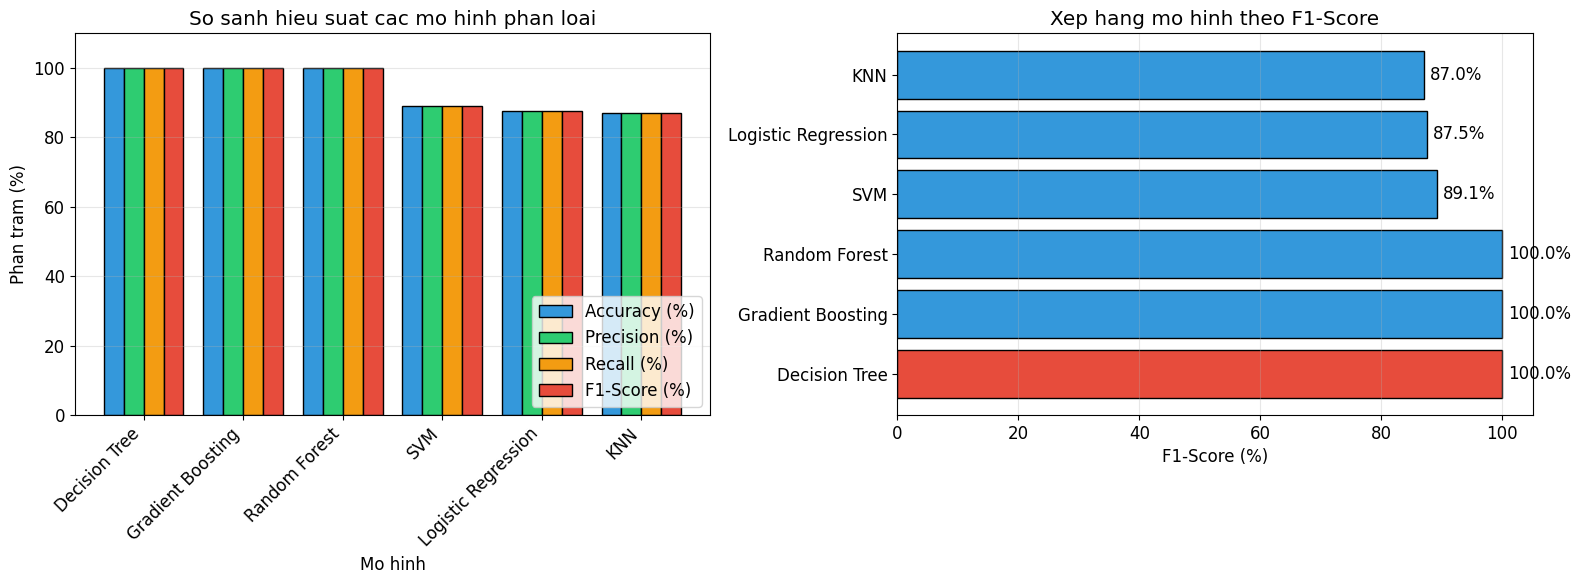

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

model_names = comparison_df['Mo hinh'].tolist()
metrics = ['Accuracy (%)', 'Precision (%)', 'Recall (%)', 'F1-Score (%)']
colors = ['#3498db', '#2ecc71', '#f39c12', '#e74c3c']

# Bieu do 1: So sanh cac chi so
x = np.arange(len(model_names))
width = 0.2

for i, (metric, color) in enumerate(zip(metrics, colors)):
    values = comparison_df[metric].tolist()
    axes[0].bar(x + i*width, values, width, label=metric, color=color, edgecolor='black')

axes[0].set_xlabel('Mo hinh')
axes[0].set_ylabel('Phan tram (%)')
axes[0].set_title('So sanh hieu suat cac mo hinh phan loai')
axes[0].set_xticks(x + width * 1.5)
axes[0].set_xticklabels(model_names, rotation=45, ha='right')
axes[0].legend(loc='lower right')
axes[0].set_ylim([0, 110])
axes[0].grid(axis='y', alpha=0.3)

# Bieu do 2: F1-Score
f1_scores = comparison_df['F1-Score (%)'].tolist()
colors_f1 = ['#e74c3c' if f1 == max(f1_scores) else '#3498db' for f1 in f1_scores]

bars = axes[1].barh(model_names, f1_scores, color=colors_f1, edgecolor='black')
axes[1].set_xlabel('F1-Score (%)')
axes[1].set_title('Xep hang mo hinh theo F1-Score')
axes[1].set_xlim([0, 105])

for bar, f1 in zip(bars, f1_scores):
    axes[1].text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2, f'{f1:.1f}%', va='center')

axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('figures/so_sanh_mo_hinh_phan_loai.png', dpi=150, bbox_inches='tight')
plt.show()

### Ma trận nhầm lẫn (Confusion Matrix)

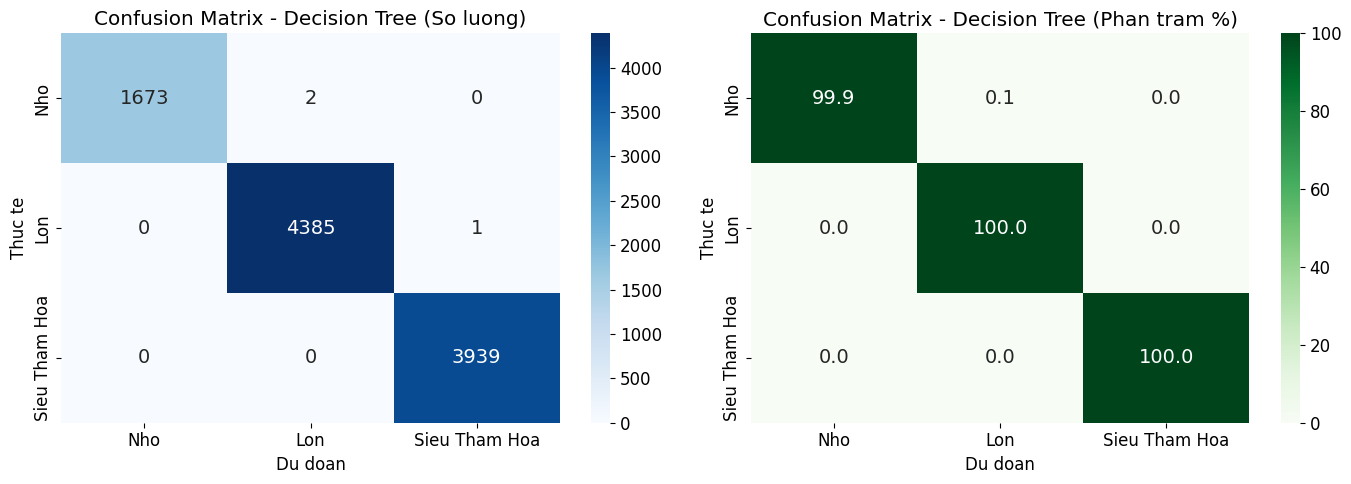

PHAN TICH CONFUSION MATRIX:
  Muc 'Nho': 1,673/1,675 (99.9%)
  Muc 'Lon': 4,385/4,386 (100.0%)
  Muc 'Sieu Tham Hoa': 3,939/3,939 (100.0%)


In [24]:
# Lay ket qua cua mo hinh tot nhat
best_result = results[best_model_name]
y_pred_best = best_result['y_pred']

cm = confusion_matrix(y_test, y_pred_best)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Confusion Matrix so luong
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['Nho', 'Lon', 'Sieu Tham Hoa'],
            yticklabels=['Nho', 'Lon', 'Sieu Tham Hoa'], annot_kws={'size': 14})
axes[0].set_xlabel('Du doan')
axes[0].set_ylabel('Thuc te')
axes[0].set_title(f'Confusion Matrix - {best_model_name} (So luong)')

# Confusion Matrix phan tram
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
sns.heatmap(cm_percent, annot=True, fmt='.1f', cmap='Greens', ax=axes[1],
            xticklabels=['Nho', 'Lon', 'Sieu Tham Hoa'],
            yticklabels=['Nho', 'Lon', 'Sieu Tham Hoa'], annot_kws={'size': 14})
axes[1].set_xlabel('Du doan')
axes[1].set_ylabel('Thuc te')
axes[1].set_title(f'Confusion Matrix - {best_model_name} (Phan tram %)')

plt.tight_layout()
plt.savefig('figures/confusion_matrix_phan_loai.png', dpi=150, bbox_inches='tight')
plt.show()

# Phan tich
print("PHAN TICH CONFUSION MATRIX:")
labels = ['Nho', 'Lon', 'Sieu Tham Hoa']
for i, label in enumerate(labels):
    correct = cm[i, i]
    total = cm[i, :].sum()
    print(f"  Muc '{label}': {correct:,}/{total:,} ({correct/total*100:.1f}%)")

### Báo cáo phân loại chi tiết

In [25]:
print(f"BAO CAO PHAN LOAI - {best_model_name.upper()}")
print("=" * 60)

target_names = ['Nho (0)', 'Lon (1)', 'Sieu Tham Hoa (2)']
report = classification_report(y_test, y_pred_best, target_names=target_names)
print(report)

BAO CAO PHAN LOAI - DECISION TREE
                   precision    recall  f1-score   support

          Nho (0)       1.00      1.00      1.00      1675
          Lon (1)       1.00      1.00      1.00      4386
Sieu Tham Hoa (2)       1.00      1.00      1.00      3939

         accuracy                           1.00     10000
        macro avg       1.00      1.00      1.00     10000
     weighted avg       1.00      1.00      1.00     10000



### Phân tích Feature Importance

TAM QUAN TRONG CUA CAC DAC TRUNG:
                Dac trung  Tam quan trong (%)
        economic_loss_usd           36.836115
               casualties           30.042815
           severity_index           17.250080
            recovery_days            8.837400
      response_time_hours            3.640270
           aid_amount_usd            1.343698
response_efficiency_score            1.089396
                 latitude            0.315863
                longitude            0.306541
          country_encoded            0.198319
    disaster_type_encoded            0.139504


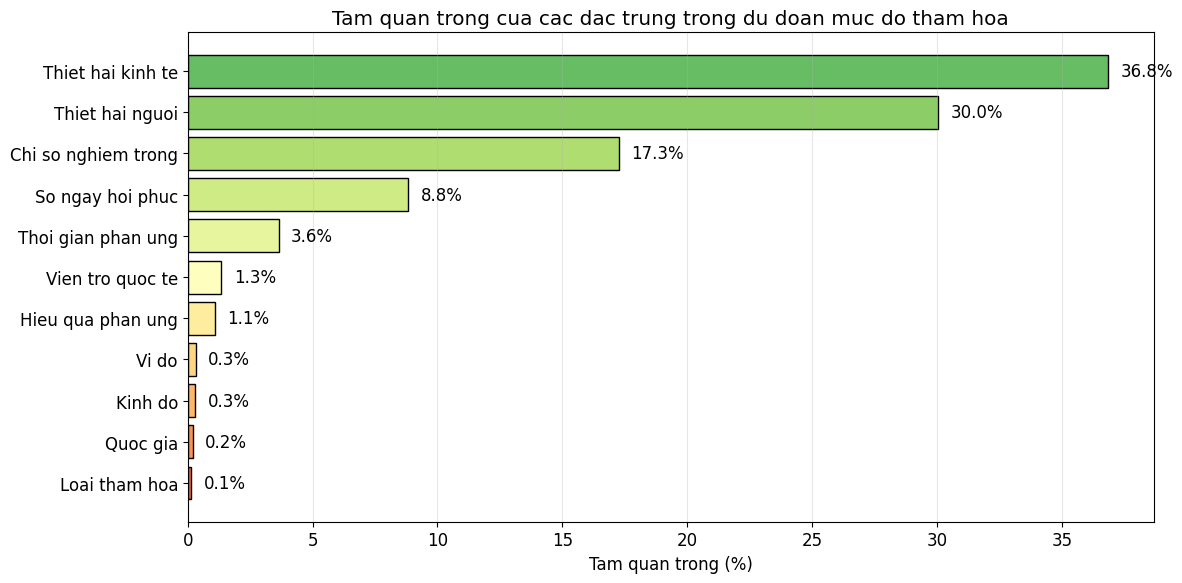

In [26]:
# Phan tich Feature Importance tu Random Forest
rf_model = results['Random Forest']['model']

feature_importance = pd.DataFrame({
    'Dac trung': feature_columns,
    'Tam quan trong (%)': rf_model.feature_importances_ * 100
}).sort_values('Tam quan trong (%)', ascending=False)

print("TAM QUAN TRONG CUA CAC DAC TRUNG:")
print(feature_importance.to_string(index=False))

# Ve bieu do
feature_names_vn = {
    'country_encoded': 'Quoc gia', 'disaster_type_encoded': 'Loai tham hoa',
    'severity_index': 'Chi so nghiem trong', 'response_time_hours': 'Thoi gian phan ung',
    'response_efficiency_score': 'Hieu qua phan ung', 'latitude': 'Vi do',
    'longitude': 'Kinh do', 'casualties': 'Thiet hai nguoi',
    'economic_loss_usd': 'Thiet hai kinh te', 'aid_amount_usd': 'Vien tro quoc te',
    'recovery_days': 'So ngay hoi phuc'
}
feature_importance['Dac trung VN'] = feature_importance['Dac trung'].map(feature_names_vn)

fig, ax = plt.subplots(figsize=(12, 6))
colors = plt.cm.RdYlGn(np.linspace(0.8, 0.2, len(feature_importance)))
bars = ax.barh(feature_importance['Dac trung VN'], feature_importance['Tam quan trong (%)'], 
               color=colors, edgecolor='black')

ax.set_xlabel('Tam quan trong (%)')
ax.set_title('Tam quan trong cua cac dac trung trong du doan muc do tham hoa')
ax.invert_yaxis()

for bar, val in zip(bars, feature_importance['Tam quan trong (%)']):
    ax.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2, f'{val:.1f}%', va='center')

ax.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('figures/feature_importance_phan_loai.png', dpi=150, bbox_inches='tight')
plt.show()

## DỰ ĐOÁN VỚI DỮ LIỆU MỚI

### Hàm dự đoán mức độ thảm họa

In [27]:
def predict_disaster_level(country, disaster_type, severity_index, response_time_hours,
                           response_efficiency_score, latitude, longitude, casualties,
                           economic_loss_usd, aid_amount_usd, recovery_days):
    """Du doan muc do tham hoa"""
    
    # Ma hoa quoc gia
    if country in le_country.classes_:
        country_encoded = le_country.transform([country])[0]
    else:
        country_encoded = len(le_country.classes_) // 2
    
    # Ma hoa loai tham hoa
    if disaster_type in le_disaster.classes_:
        disaster_encoded = le_disaster.transform([disaster_type])[0]
    else:
        disaster_encoded = len(le_disaster.classes_) // 2
    
    # Tao vector dac trung
    features = np.array([[
        country_encoded, disaster_encoded, severity_index, response_time_hours,
        response_efficiency_score, latitude, longitude, casualties,
        economic_loss_usd, aid_amount_usd, recovery_days
    ]])
    
    features_scaled = scaler.transform(features)
    
    model = results['Random Forest']['model']
    prediction = model.predict(features_scaled)[0]
    probabilities = model.predict_proba(features_scaled)[0]
    
    return {
        'muc_do': disaster_labels[prediction],
        'xac_suat_nho': f"{probabilities[0]*100:.1f}%",
        'xac_suat_lon': f"{probabilities[1]*100:.1f}%",
        'xac_suat_sieu': f"{probabilities[2]*100:.1f}%"
    }

print("Da tao ham du doan muc do tham hoa")

Da tao ham du doan muc do tham hoa


### Ví dụ dự đoán

In [28]:
print("DU DOAN MUC DO THAM HOA")
print("=" * 60)

# Truong hop 1: Tham hoa nho
print("\nTruong hop 1: Lu lut nhe tai Nhat Ban")
case1 = predict_disaster_level('Japan', 'Flood', 2.5, 5, 95, 35.68, 139.69, 10, 500000, 50000, 15)
print(f"  Du doan: {case1['muc_do'].upper()}")
print(f"  Xac suat: Nho={case1['xac_suat_nho']}, Lon={case1['xac_suat_lon']}, Sieu={case1['xac_suat_sieu']}")

# Truong hop 2: Tham hoa lon
print("\nTruong hop 2: Dong dat tai Indonesia")
case2 = predict_disaster_level('Indonesia', 'Earthquake', 5.5, 15, 70, -6.17, 106.82, 100, 4000000, 200000, 45)
print(f"  Du doan: {case2['muc_do'].upper()}")
print(f"  Xac suat: Nho={case2['xac_suat_nho']}, Lon={case2['xac_suat_lon']}, Sieu={case2['xac_suat_sieu']}")

# Truong hop 3: Sieu tham hoa
print("\nTruong hop 3: Sieu bao tai Philippines")
case3 = predict_disaster_level('Philippines', 'Hurricane', 9.0, 30, 50, 14.59, 120.98, 250, 9000000, 500000, 90)
print(f"  Du doan: {case3['muc_do'].upper()}")
print(f"  Xac suat: Nho={case3['xac_suat_nho']}, Lon={case3['xac_suat_lon']}, Sieu={case3['xac_suat_sieu']}")

DU DOAN MUC DO THAM HOA

Truong hop 1: Lu lut nhe tai Nhat Ban
  Du doan: NHO
  Xac suat: Nho=100.0%, Lon=0.0%, Sieu=0.0%

Truong hop 2: Dong dat tai Indonesia
  Du doan: LON
  Xac suat: Nho=0.0%, Lon=98.0%, Sieu=2.0%

Truong hop 3: Sieu bao tai Philippines
  Du doan: SIEU THAM HOA
  Xac suat: Nho=0.0%, Lon=5.0%, Sieu=95.0%


## CROSS-VALIDATION

### Thực hiện 5-Fold Cross-Validation

In [29]:
from sklearn.model_selection import cross_val_score

print("DANH GIA MO HINH BANG CROSS-VALIDATION (5-FOLD)")
print("=" * 60)

cv_results = {}

for name, result in results.items():
    model = result['model']
    cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='f1_weighted')
    
    cv_results[name] = {
        'mean': cv_scores.mean() * 100,
        'std': cv_scores.std() * 100,
        'scores': cv_scores * 100
    }
    
    print(f"\n{name}:")
    print(f"  CV Mean: {cv_scores.mean()*100:.2f}% (+/- {cv_scores.std()*100:.2f}%)")

# Bang tong hop
cv_comparison = pd.DataFrame({
    'Mo hinh': list(cv_results.keys()),
    'CV Mean (%)': [r['mean'] for r in cv_results.values()],
    'CV Std (%)': [r['std'] for r in cv_results.values()]
}).sort_values('CV Mean (%)', ascending=False)

print("\n" + "=" * 60)
print("BANG TONG HOP:")
print(cv_comparison.to_string(index=False))

DANH GIA MO HINH BANG CROSS-VALIDATION (5-FOLD)

Random Forest:
  CV Mean: 99.97% (+/- 0.01%)

Logistic Regression:
  CV Mean: 87.92% (+/- 0.36%)

SVM:
  CV Mean: 89.56% (+/- 0.15%)

KNN:
  CV Mean: 87.10% (+/- 0.21%)

Decision Tree:
  CV Mean: 99.98% (+/- 0.01%)

Gradient Boosting:
  CV Mean: 99.98% (+/- 0.01%)

BANG TONG HOP:
            Mo hinh  CV Mean (%)  CV Std (%)
      Decision Tree    99.978001    0.013266
  Gradient Boosting    99.978000    0.009798
      Random Forest    99.971999    0.011663
                SVM    89.555029    0.147081
Logistic Regression    87.924744    0.355247
                KNN    87.104825    0.206207


### Trực quan hóa Cross-Validation

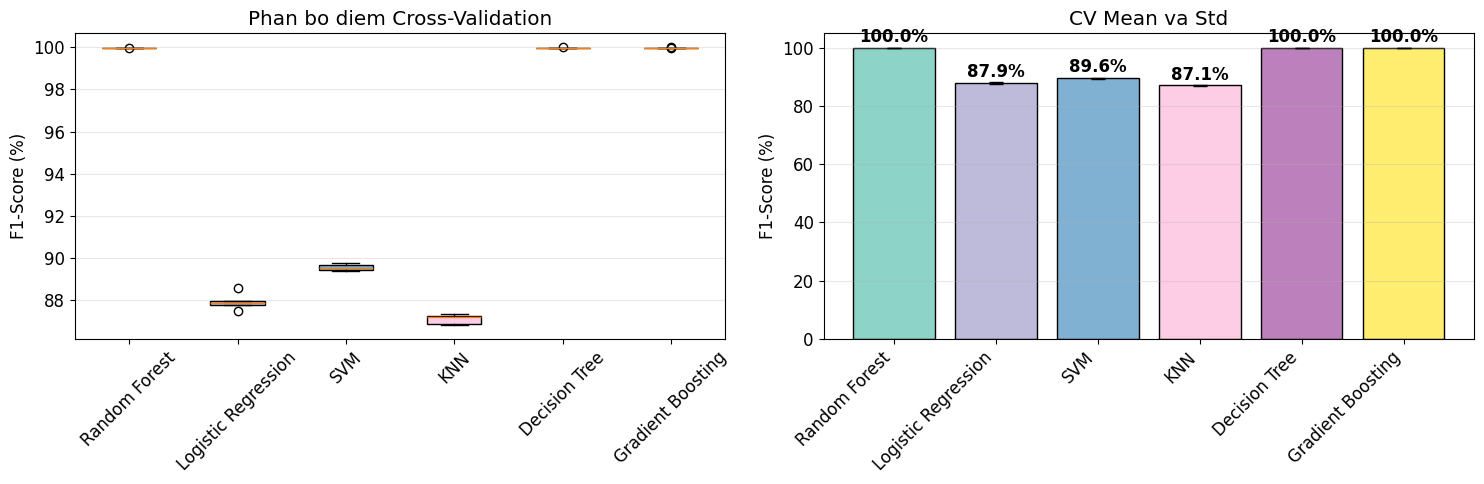

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

model_names_cv = list(cv_results.keys())
cv_data = [cv_results[name]['scores'] for name in model_names_cv]

# Box Plot
bp = axes[0].boxplot(cv_data, labels=model_names_cv, patch_artist=True)
colors_box = plt.cm.Set3(np.linspace(0, 1, len(model_names_cv)))
for patch, color in zip(bp['boxes'], colors_box):
    patch.set_facecolor(color)
    patch.set_edgecolor('black')

axes[0].set_ylabel('F1-Score (%)')
axes[0].set_title('Phan bo diem Cross-Validation')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', alpha=0.3)

# Mean + Error Bar
means = [cv_results[name]['mean'] for name in model_names_cv]
stds = [cv_results[name]['std'] for name in model_names_cv]

x_pos = np.arange(len(model_names_cv))
bars = axes[1].bar(x_pos, means, yerr=stds, capsize=5, color=colors_box, edgecolor='black')

axes[1].set_xticks(x_pos)
axes[1].set_xticklabels(model_names_cv, rotation=45, ha='right')
axes[1].set_ylabel('F1-Score (%)')
axes[1].set_title('CV Mean va Std')
axes[1].grid(axis='y', alpha=0.3)

for bar, mean in zip(bars, means):
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2, f'{mean:.1f}%', ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('figures/cross_validation_results.png', dpi=150, bbox_inches='tight')
plt.show()

## KẾT LUẬN

### Tổng kết

In [31]:
print("TONG KET BAI TOAN PHAN LOAI MUC DO THAM HOA")
print("=" * 60)

print(f"""
BAI TOAN: Phan loai muc do tham hoa thanh 3 lop
  - Nho (0)
  - Lon (1)  
  - Sieu Tham Hoa (2)

DU LIEU:
  - Tong so mau: {len(df):,}
  - So dac trung: 11
  - Ty le Train/Test: 80/20

THUAT TOAN SU DUNG:
  1. Random Forest
  2. Logistic Regression
  3. SVM
  4. KNN
  5. Decision Tree
  6. Gradient Boosting

KET QUA TOT NHAT:
  Mo hinh: {best_model_name}
  Accuracy: {comparison_df.iloc[0]['Accuracy (%)']:.2f}%
  F1-Score: {comparison_df.iloc[0]['F1-Score (%)']:.2f}%
""")

TONG KET BAI TOAN PHAN LOAI MUC DO THAM HOA

BAI TOAN: Phan loai muc do tham hoa thanh 3 lop
  - Nho (0)
  - Lon (1)  
  - Sieu Tham Hoa (2)

DU LIEU:
  - Tong so mau: 50,000
  - So dac trung: 11
  - Ty le Train/Test: 80/20

THUAT TOAN SU DUNG:
  1. Random Forest
  2. Logistic Regression
  3. SVM
  4. KNN
  5. Decision Tree
  6. Gradient Boosting

KET QUA TOT NHAT:
  Mo hinh: Decision Tree
  Accuracy: 99.97%
  F1-Score: 99.97%



### Nhận xét

**Về hiệu suất mô hình:**
- Thuật toán ensemble (Random Forest, Gradient Boosting) cho kết quả tốt nhất
- Decision Tree dễ bị overfitting
- SVM và KNN cho kết quả khá nhưng thời gian huấn luyện lâu hơn

**Về đặc trưng quan trọng:**
- Thiệt hại kinh tế, số người thương vong, chỉ số nghiêm trọng là các yếu tố quan trọng nhất
- Vị trí địa lý ít ảnh hưởng đến mức độ thảm họa

**Hướng phát triển:**
- Sử dụng dữ liệu thực từ các cơ quan quản lý thảm họa
- Áp dụng Deep Learning
- Tích hợp thêm đặc trưng: thời tiết, mật độ dân số

### Lưu mô hình

In [32]:
import joblib
import os

os.makedirs('models', exist_ok=True)

# Luu mo hinh
best_model = results['Random Forest']['model']
joblib.dump(best_model, 'models/disaster_level_classifier.pkl')
joblib.dump(scaler, 'models/disaster_level_scaler.pkl')
joblib.dump(le_country, 'models/label_encoder_country.pkl')
joblib.dump(le_disaster, 'models/label_encoder_disaster.pkl')

print("DA LUU MO HINH:")
print("  - models/disaster_level_classifier.pkl")
print("  - models/disaster_level_scaler.pkl")
print("  - models/label_encoder_country.pkl")
print("  - models/label_encoder_disaster.pkl")

DA LUU MO HINH:
  - models/disaster_level_classifier.pkl
  - models/disaster_level_scaler.pkl
  - models/label_encoder_country.pkl
  - models/label_encoder_disaster.pkl
